<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Le-traitement-du-prix-non-renseigné" data-toc-modified-id="Le-traitement-du-prix-non-renseigné-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Le traitement du prix non renseigné</a></span></li><li><span><a href="#Le-traitement-des-enregistrements-avec-Age-non-renseigné" data-toc-modified-id="Le-traitement-des-enregistrements-avec-Age-non-renseigné-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Le traitement des enregistrements avec Age non renseigné</a></span></li><li><span><a href="#L'estimation-des-âges-manquants-à-l'aide-de-attributs-Sex-et-Classe" data-toc-modified-id="L'estimation-des-âges-manquants-à-l'aide-de-attributs-Sex-et-Classe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>L'estimation des âges manquants à l'aide de attributs Sex et Classe</a></span></li><li><span><a href="#L'estimation-des-âges-manquants-à-l'aide-de-attributs-Sex-,-Classe-et-Cabine" data-toc-modified-id="L'estimation-des-âges-manquants-à-l'aide-de-attributs-Sex-,-Classe-et-Cabine-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>L'estimation des âges manquants à l'aide de attributs Sex , Classe et Cabine</a></span></li><li><span><a href="#La-recherche-des-voyageurs-en-groupe" data-toc-modified-id="La-recherche-des-voyageurs-en-groupe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>La recherche des voyageurs en groupe</a></span></li></ul></div>

In [54]:
import pandas as pd, seaborn as sns, os, time, warnings
from socket import gethostname as host

if host() == 'thor':
    os.chdir(r"F:\00--Donnees")
else:
    os.chdir(r"C:\Solutions")
    

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [55]:
train=pd.read_csv("donnees/titanic-train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test=pd.read_csv("donnees/titanic-test.csv")
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
donnees = pd.concat([train,test],sort=False)
donnees.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
donnees[donnees.Survived.isna()].tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [59]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [60]:
donnees['Title'] = donnees.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(donnees['Title'], donnees['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [61]:
# donnees['Title'] = donnees['Title'].replace(['Dr','Rev'],'Soigneur')
# donnees['Title'] = donnees['Title'].replace(['Capt','Col','Major'], 'Militaire')
# donnees['Title'] = donnees['Title'].replace(['Lady', 'Countess',  'Don',  'Sir', 'Jonkheer', 'Dona'], 'Noblesse')
donnees['Title'] = donnees['Title'].replace(['Lady', 'Countess',  'Don',  'Sir', 'Jonkheer', 
                                             'Dona','Capt','Col','Major',
                                             'Dr','Rev'], 'Noblesse')

donnees['Title'] = donnees['Title'].replace('Mlle', 'Miss')
donnees['Title'] = donnees['Title'].replace('Ms', 'Miss')
donnees['Title'] = donnees['Title'].replace('Mme', 'Mrs')
donnees['Sex']   = donnees['Sex'].replace("male","Homme")
donnees['Sex']   = donnees['Sex'].replace("female","Femme")
pd.crosstab(donnees['Title'], donnees['Sex'])

Sex,Femme,Homme
Title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Noblesse,4,25


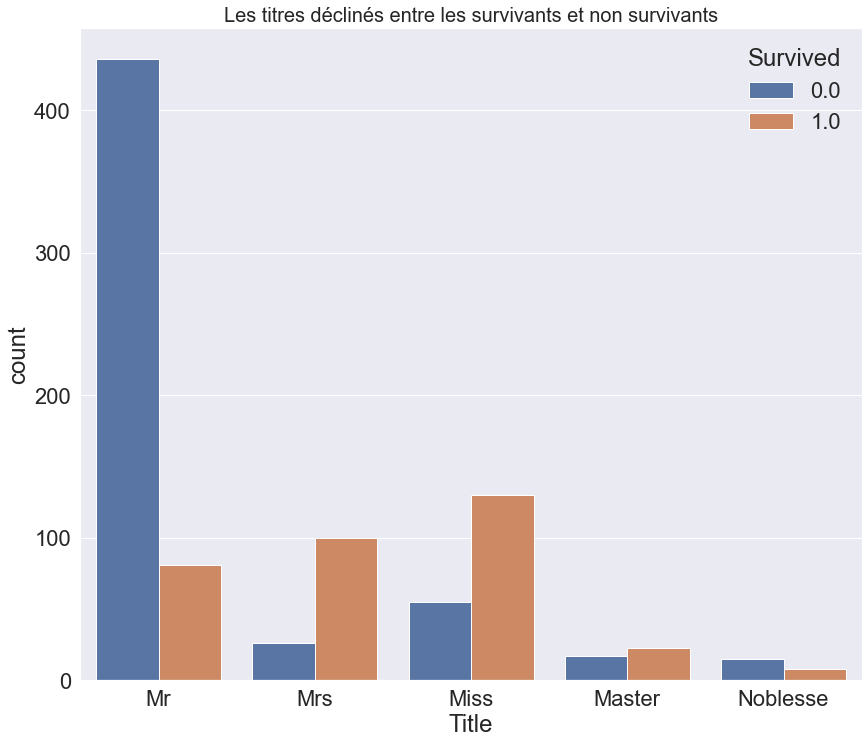

In [62]:
plt.figure(figsize=(14,12))
plt.title('Les titres déclinés entre les survivants et non survivants',size=20)
sns_plot = sns.countplot(x='Title',hue='Survived',data=donnees)

In [63]:
donnees.Name = donnees.Name.str.extract('([A-Za-z]+)\,', expand=False)
donnees.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,Braund,Homme,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,Cumings,Femme,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,Heikkinen,Femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,Futrelle,Femme,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,Allen,Homme,35.0,0,0,373450,8.0500,NaN,S,Mr


In [64]:
donnees['TailleFamille'] = donnees['Parch'] + donnees['SibSp'] + 1
donnees.TailleFamille = donnees.TailleFamille.astype('int8')

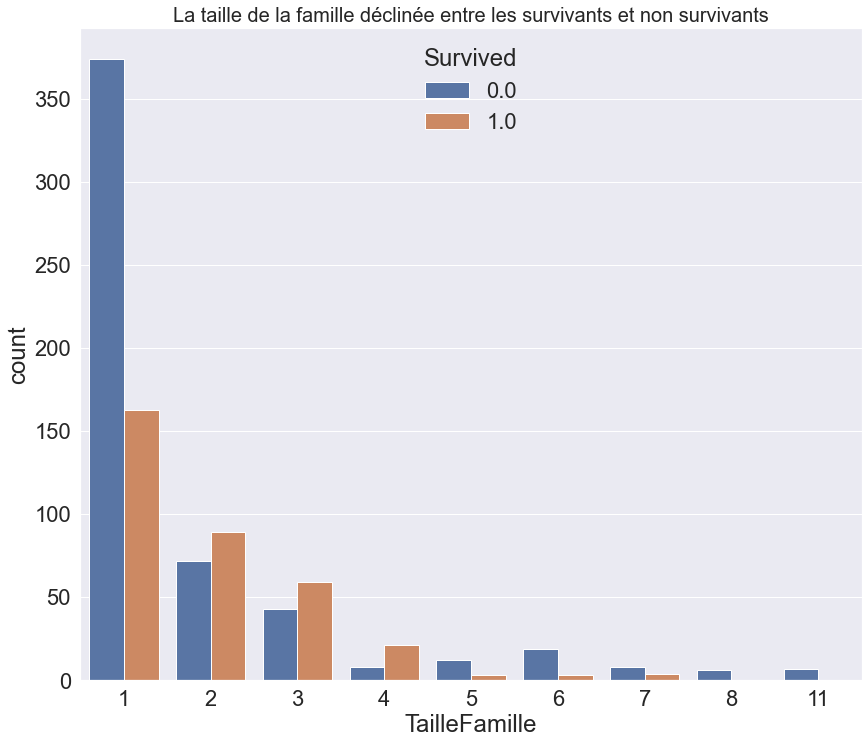

In [65]:
plt.figure(figsize=(14,12))
plt.title('La taille de la famille déclinée entre les survivants et non survivants',size=20)
sns_plot = sns.countplot(x='TailleFamille',hue='Survived',data=donnees)

In [66]:
donnees['Pont'] = donnees.Cabin.str.extract('([A-Za-z])', expand=False)
donnees.Pont = donnees.Pont.fillna('Pas')
pd.crosstab(donnees.Pont, np.ones(donnees.shape[0]))

col_0,1.0
Pont,
A,22
B,65
C,94
D,46
E,41
F,21
G,5
Pas,1014
T,1


In [67]:
donnees.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TailleFamille,Pont
0,1,0.0,3,Braund,Homme,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Pas
1,2,1.0,1,Cumings,Femme,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,C
2,3,1.0,3,Heikkinen,Femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Pas
3,4,1.0,1,Futrelle,Femme,35.0,1,0,113803,53.1000,C123,S,Mrs,2,C
4,5,0.0,3,Allen,Homme,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Pas


In [68]:
donnees['TicketNum'] = donnees.Ticket.replace(regex=r'([^0-9]+)',value='')
donnees.Ticket = donnees.Ticket.replace(regex=r'([^a-zA-Z]+)',value='')
donnees.Ticket = donnees.Ticket.replace({r'^(CASOTON|SOTONO|STONO|STONOQ)$':'SOTONOQ', 
                                         r'^(SC|SCParis)$':'SCPARIS', 
                                         r'^FCC$':'FC',
                                         r'^$':'Vide'}, regex=True) 

In [69]:
donnees.Ticket.sort_values().unique()

array(['A', 'AQ', 'AS', 'C', 'CA', 'FC', 'Fa', 'LINE', 'LP', 'PC', 'PP',
       'PPP', 'SCA', 'SCAH', 'SCAHBasle', 'SCOW', 'SCPARIS', 'SOC', 'SOP',
       'SOPP', 'SOTONOQ', 'SP', 'SWPP', 'Vide', 'WC', 'WEP'], dtype=object)

In [70]:
donnees['Classe'] = donnees.Pclass
donnees['Port'] = donnees.Embarked
donnees.Port = donnees.Port.fillna('Pas')
donnees['Cabine'] = donnees["Cabin"].apply(
                     lambda x: 0 if type(x) == float else 1)

donnees['ConjointsOuFratrie'] = donnees.SibSp
donnees['EnfantsOuParents']   = donnees.Parch

donnees = donnees.drop(['Parch','SibSp','Cabin','Pclass','Embarked'], axis=1)

donnees = donnees[['Survived','Name','Age','Fare','Sex', 'Title','TailleFamille','Pont',
                   'Classe','Port','Cabine','Ticket','TicketNum','ConjointsOuFratrie','EnfantsOuParents','PassengerId']]
donnees.head()

,Survived,Name,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,TicketNum,ConjointsOuFratrie,EnfantsOuParents,PassengerId
0,0.0,Braund,22.0,7.2500,Homme,Mr,2,Pas,3,S,0,A,521171,1,0,1
1,1.0,Cumings,38.0,71.2833,Femme,Mrs,2,C,1,C,1,PC,17599,1,0,2
2,1.0,Heikkinen,26.0,7.9250,Femme,Miss,1,Pas,3,S,0,SOTONOQ,23101282,0,0,3
3,1.0,Futrelle,35.0,53.1000,Femme,Mrs,2,C,1,S,1,Vide,113803,1,0,4
4,0.0,Allen,35.0,8.0500,Homme,Mr,1,Pas,3,S,0,Vide,373450,0,0,5


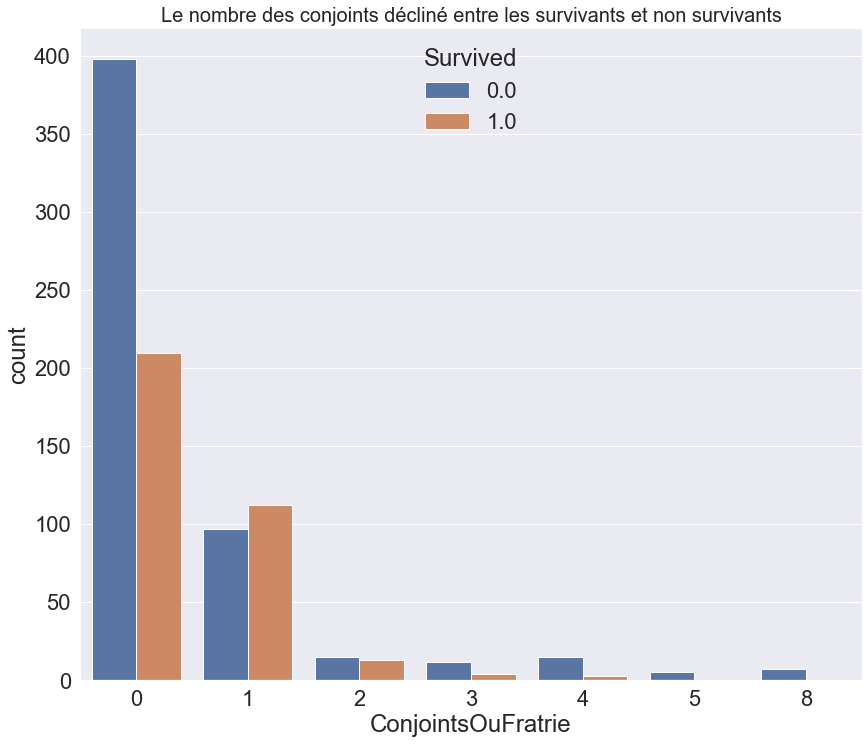

In [71]:
plt.figure(figsize=(14,12))
plt.title('Le nombre des conjoints décliné entre les survivants et non survivants',size=20)
sns_plot = sns.countplot(x='ConjointsOuFratrie',hue='Survived',data=donnees);

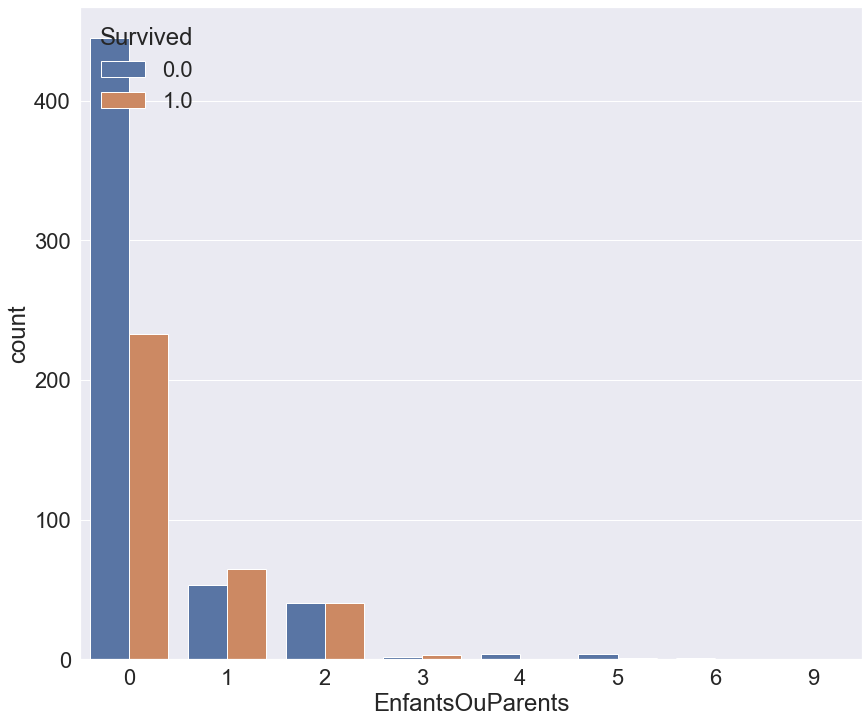

In [72]:
plt.figure(figsize=(14,12))
sns_plot = sns.countplot(x='EnfantsOuParents',hue='Survived',data=donnees);

In [73]:
donnees.describe(include='all')

,Survived,Name,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,TicketNum,ConjointsOuFratrie,EnfantsOuParents,PassengerId
count,891.000000,1309,1046.000000,1308.000000,1309,1309,1309.000000,1309,1309.000000,1309,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000
unique,NaN,872,NaN,NaN,2,5,NaN,9,NaN,4,NaN,26,924,NaN,NaN,NaN
top,NaN,Andersson,NaN,NaN,Homme,Mr,NaN,Pas,NaN,S,NaN,Vide,2343,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,843,757,NaN,1014,NaN,914,NaN,957,11,NaN,NaN,NaN
mean,0.383838,NaN,29.881138,33.295479,NaN,NaN,1.883881,NaN,2.294882,NaN,0.225363,NaN,NaN,0.498854,0.385027,655.000000
std,0.486592,NaN,14.413493,51.758668,NaN,NaN,1.583639,NaN,0.837836,NaN,0.417981,NaN,NaN,1.041658,0.865560,378.020061
min,0.000000,NaN,0.170000,0.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,0.000000,NaN,21.000000,7.895800,NaN,NaN,1.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,328.000000
50%,0.000000,NaN,28.000000,14.454200,NaN,NaN,1.000000,NaN,3.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,655.000000
75%,1.000000,NaN,39.000000,31.275000,NaN,NaN,2.000000,NaN,3.000000,NaN,0.000000,NaN,NaN,1.000000,0.000000,982.000000


In [74]:
donnees.isnull().sum()

Survived              418
Name                    0
Age                   263
Fare                    1
Sex                     0
Title                   0
TailleFamille           0
Pont                    0
Classe                  0
Port                    0
Cabine                  0
Ticket                  0
TicketNum               0
ConjointsOuFratrie      0
EnfantsOuParents        0
PassengerId             0
dtype: int64

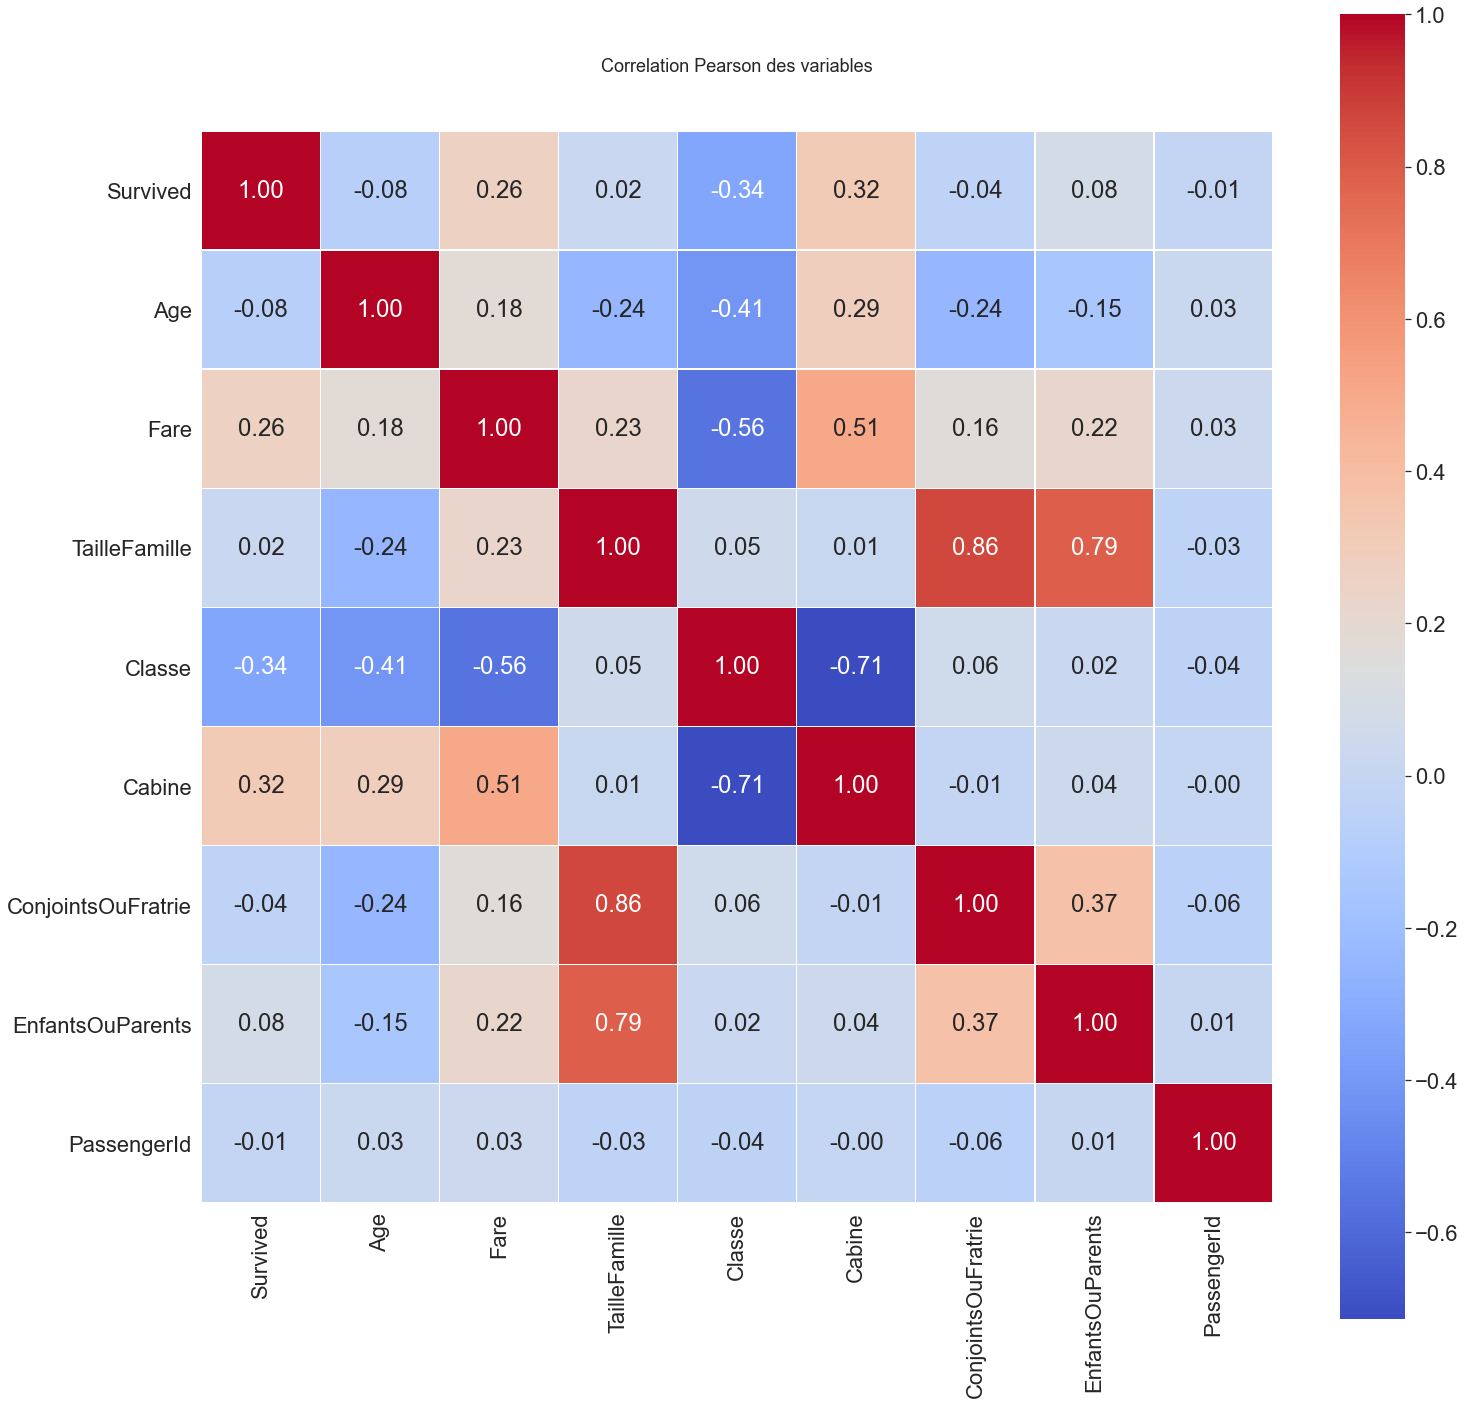

In [75]:
plt.figure(figsize=(24,24))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.set(font_scale=2)
sns_plot = sns.heatmap(donnees.corr(), fmt= '.2f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

# Le traitement du prix non renseigné

In [76]:
donnees[donnees['Fare'].isnull()]

,Survived,Name,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,TicketNum,ConjointsOuFratrie,EnfantsOuParents,PassengerId
152,NaN,Storey,60.5,NaN,Homme,Mr,1,Pas,3,S,0,Vide,3701,0,0,1044


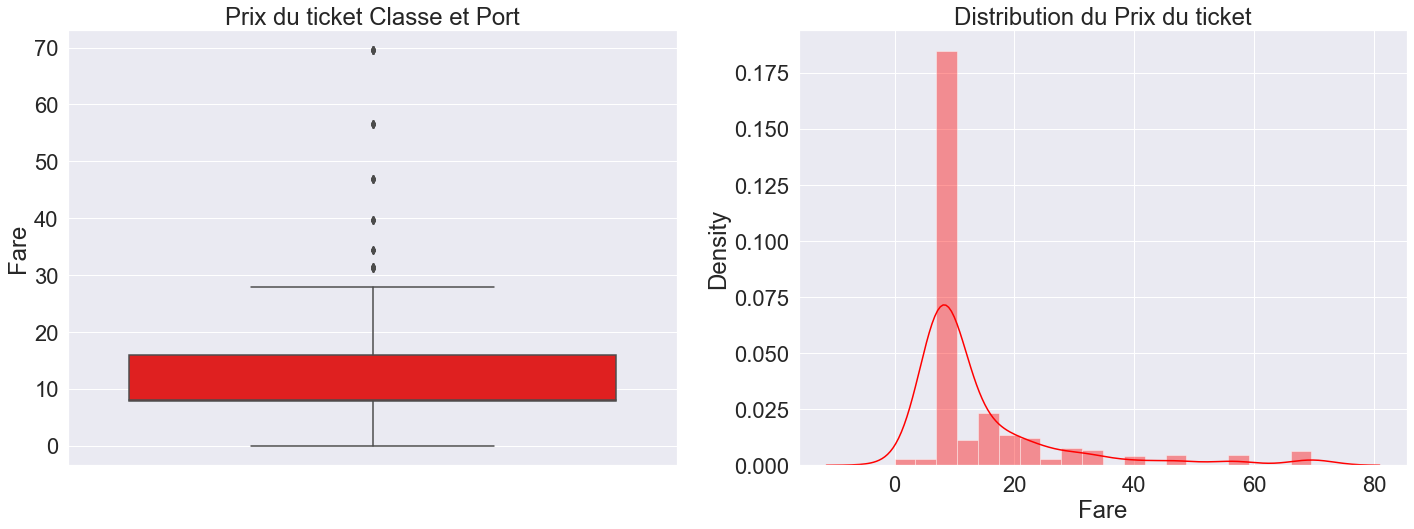

In [77]:
plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
        
sns.boxplot(y='Fare',data=donnees[(donnees['Port'] == 'S') & 
                     (donnees['Classe'] == 3) ],color='red')
plt.title('Prix du ticket Classe et Port')
plt.subplot(1, 2, 2)

sns.distplot(donnees[(donnees.Port == 'S') & 
                     (donnees.Classe == 3) & 
                     ~ donnees.Fare.isna()].Fare, color='red', bins = 20);
plt.title('Distribution du Prix du ticket');

In [90]:
donnees[(donnees['Port'] == 'S') & (donnees['Classe'] == 3)].Fare.median()

8.05

In [88]:
donnees.Fare[donnees['Fare'].isna()] = donnees[(donnees['Port'] == 'S') & (donnees['Classe'] == 3)].Fare.median()

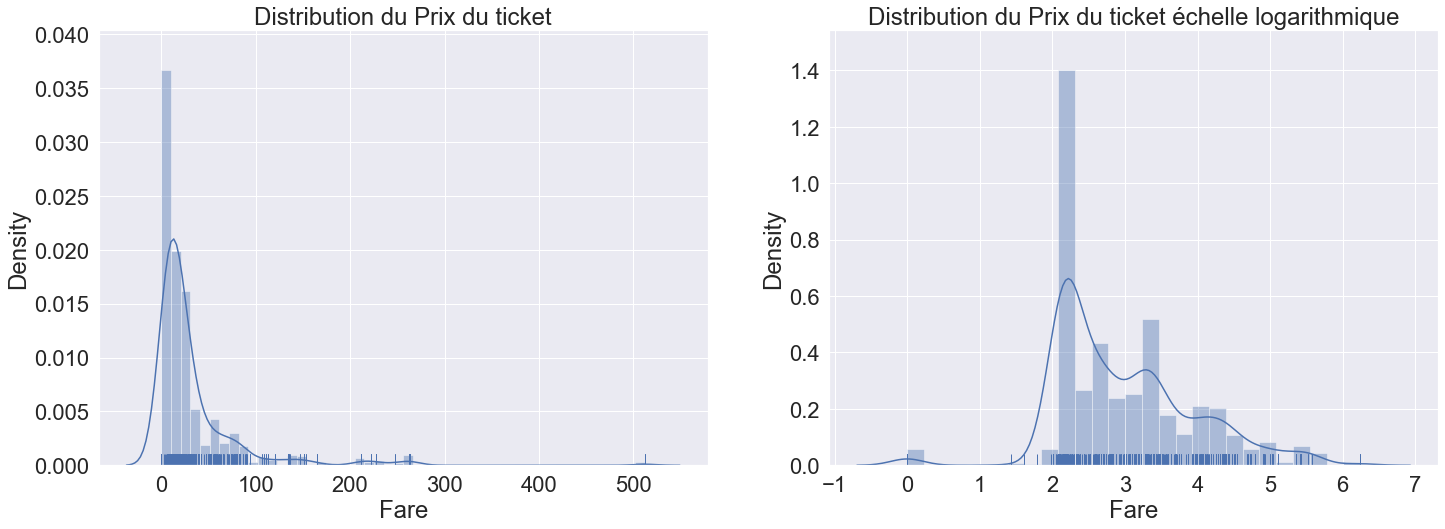

In [91]:
plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
        
sns.distplot(donnees.Fare, rug=True);

plt.title('Distribution du Prix du ticket')
plt.subplot(1, 2, 2)

sns.distplot(np.log(donnees.Fare+1), rug=True);

plt.title('Distribution du Prix du ticket échelle logarithmique');

# Le traitement des enregistrements avec Age non renseigné

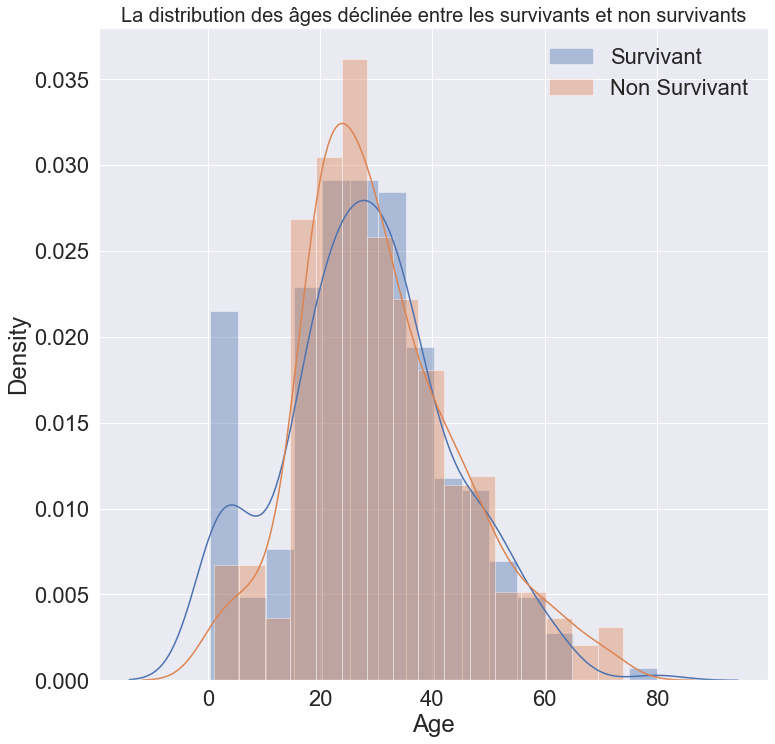

In [81]:
plt.figure(figsize=(12,12))
plt.title('La distribution des âges déclinée entre les survivants et non survivants',size=20)
sns_plot = sns.distplot(donnees[(~donnees.Age.isna())&(donnees.Survived == 1)].Age,label='Survivant')
sns_plot = sns.distplot(donnees[(~donnees.Age.isna())&(donnees.Survived == 0)].Age,label='Non Survivant')
plt.legend()

In [82]:
donnees.columns

Index(['Survived', 'Name', 'Age', 'Fare', 'Sex', 'Title', 'TailleFamille',
       'Pont', 'Classe', 'Port', 'Cabine', 'Ticket', 'TicketNum',
       'ConjointsOuFratrie', 'EnfantsOuParents', 'PassengerId'],
      dtype='object')

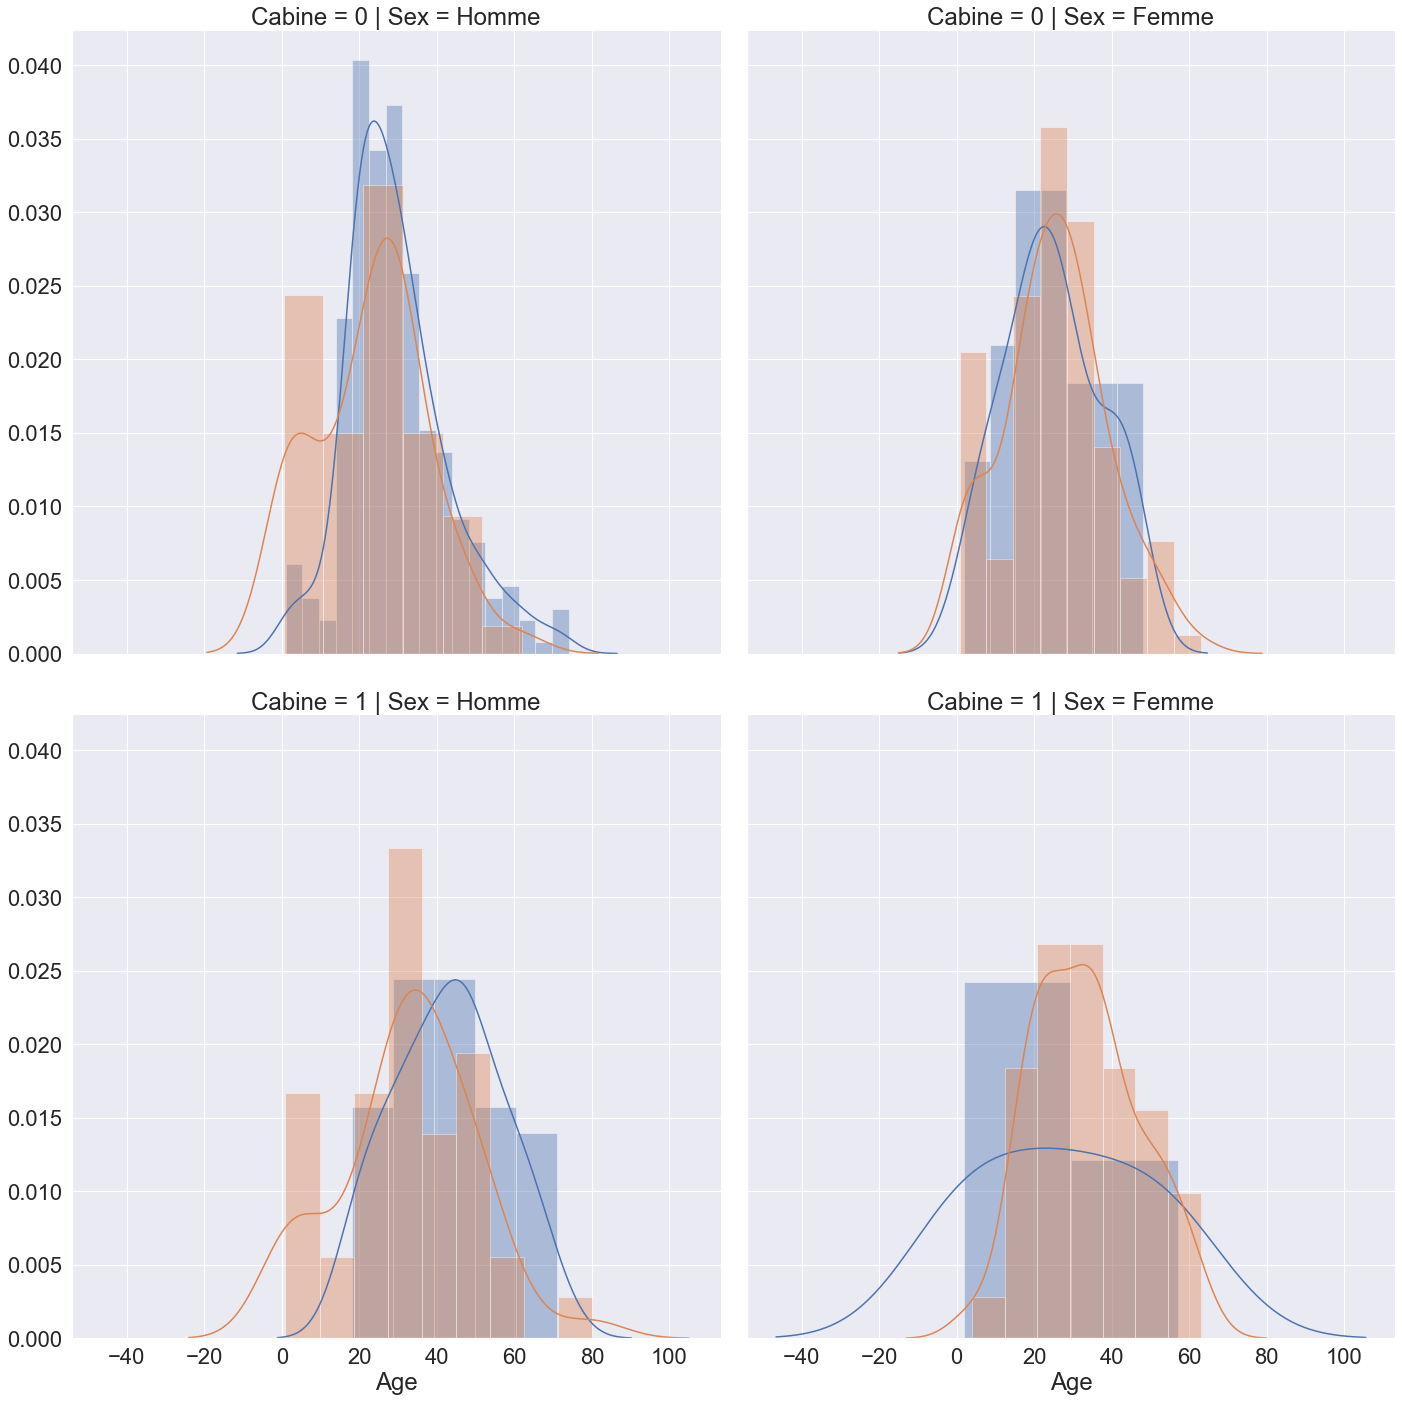

In [83]:
sns_plot = sns.FacetGrid(data=donnees[~donnees.Age.isna()],
                         col='Sex',row='Cabine', hue='Survived',size=10,aspect=1);
sns_plot.map(sns.distplot,'Age');

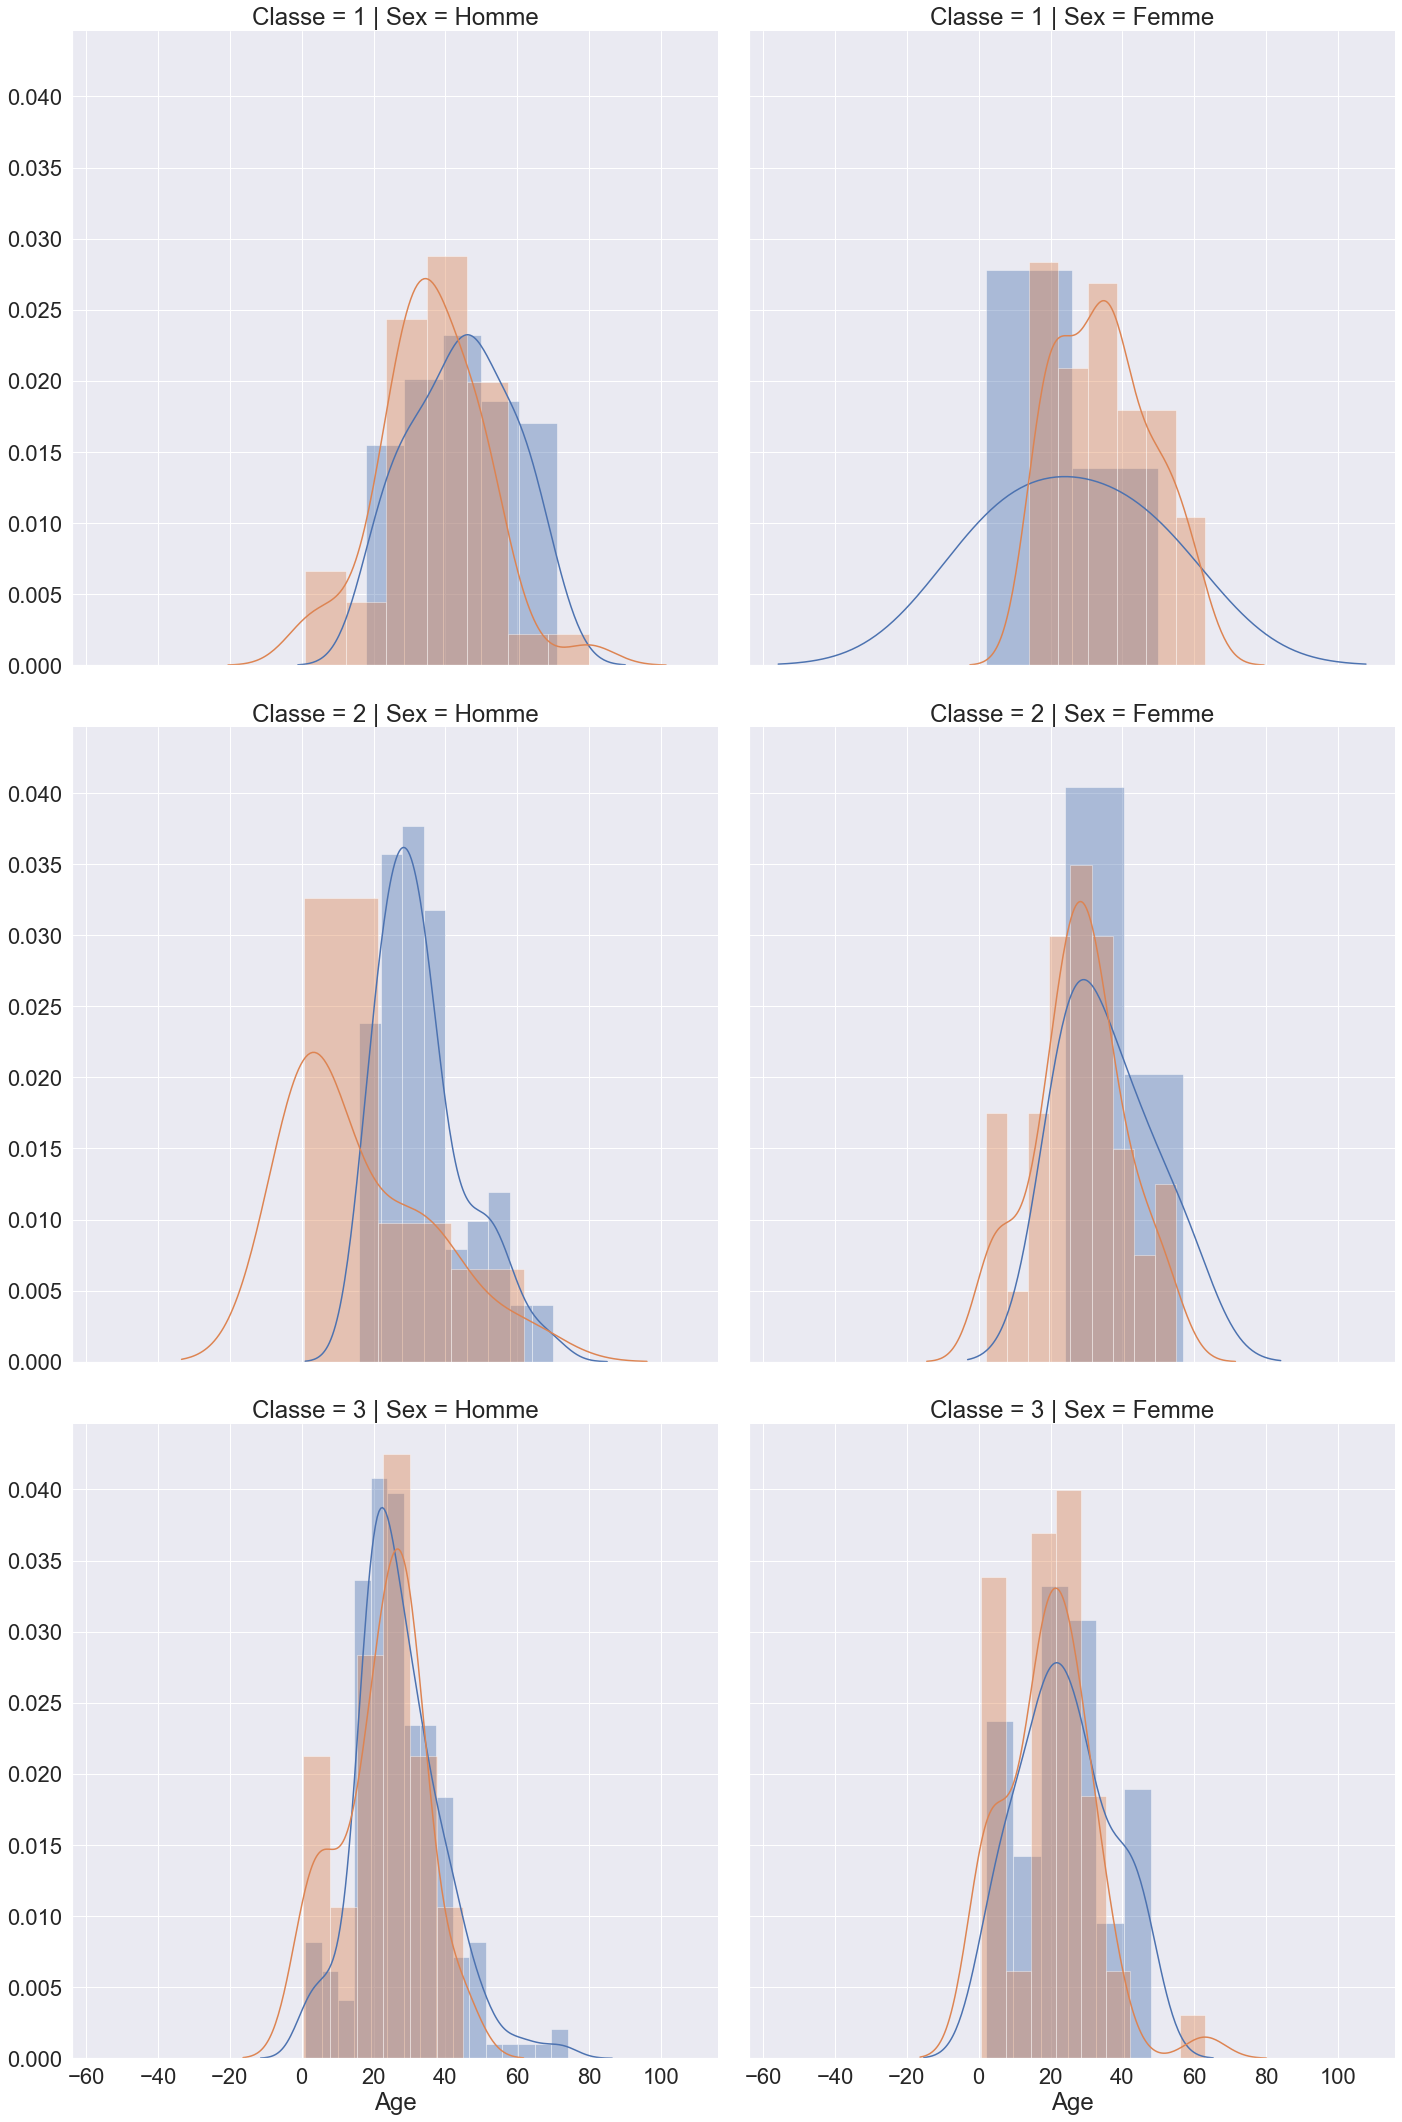

In [84]:
sns_plot = sns.FacetGrid(data=donnees[~donnees.Age.isna()],
                  col='Sex',row='Classe', hue='Survived',size=10,aspect=1);
sns_plot.map(sns.distplot,'Age');

In [85]:
donnees['AgeOld'] = donnees.Age

In [86]:
donnees.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

# L'estimation des âges manquants à l'aide de attributs Sex et Classe

In [111]:
coefficient = 1.4
ageCalc = donnees[~donnees.Age.isna()].groupby(['Sex','Classe']).agg({'Age':['mean','std']})
ageCalc.columns = ['_'.join(col).rstrip('_') for col in ageCalc.columns]
ageCalc.reset_index(inplace=True)
ageCalc['borneMin'] = ageCalc.Age_mean - ageCalc.Age_std*coefficient
ageCalc['borneMax'] = ageCalc.Age_mean + ageCalc.Age_std*coefficient
ageCalc.drop(columns=['Age_mean','Age_std'],inplace=True)
ageCalcCount = donnees[donnees.Age.isna()].groupby(['Sex','Classe']).agg({'Title':['count']}).reset_index()
ageCalcCount.columns = ['Sex','Classe','nb']
ageCalc = ageCalc.merge(ageCalcCount,on=['Sex','Classe'])
ageCalc

,Sex,Classe,borneMin,borneMax,nb
0,Femme,1,17.056150,57.019038,11
1,Femme,2,9.422778,45.575668,3
2,Femme,3,5.097973,39.272685,64
3,Homme,1,20.619331,61.439212,28
4,Homme,2,11.247020,50.383740,13
5,Homme,3,9.606883,42.317645,144


In [35]:
ageRand = pd.DataFrame(columns=['Sex','Classe','Age'])
for i in [ (row.Sex,row.Classe,np.random.randint(round(row.borneMin),round(row.borneMax),size=row.nb)) 
     for indx, row in ageCalc.iterrows()]:
    calc = pd.DataFrame(columns=['Sex','Classe','Age'])
    calc.Age    = i[2]
    calc.Sex    = i[0]
    calc.Classe = i[1]
    ageRand = pd.concat([ageRand,calc])

In [36]:
for sex in ageRand.Sex.unique():
    for classe in ageRand.Classe.unique():
            donnees['Age'][ donnees.Age.isna()&
                             (donnees.Sex == sex)&
                             (donnees.Classe == classe)] = ageRand[
                                                       (ageRand.Sex == sex)&
                                                       (ageRand.Classe == classe)].Age
donnees.Age = donnees.Age.astype('int8') 
donnees['Age01'] = donnees.Age.values
donnees.Age = donnees.AgeOld

In [37]:
donnees.Age01.isna().sum()

0

# L'estimation des âges manquants à l'aide de attributs Sex , Classe et Cabine

In [38]:
ageCalc = donnees[~donnees.Age.isna()].groupby(['Sex','Classe','Cabine']).agg({'Age':['mean','std']})
ageCalc.columns = ['_'.join(col).rstrip('_') for col in ageCalc.columns]
ageCalc.reset_index(inplace=True)
ageCalc['borneMin'] = ageCalc.Age_mean - ageCalc.Age_std*coefficient
ageCalc['borneMax'] = ageCalc.Age_mean + ageCalc.Age_std*coefficient
ageCalc.drop(columns=['Age_mean','Age_std'],inplace=True)
ageCalcCount = donnees[donnees.Age.isna()].groupby(['Sex','Classe','Cabine']).agg({'Title':['count']}).reset_index()
ageCalcCount.columns = ['Sex','Classe','Cabine','nb']
ageCalc = ageCalc.merge(ageCalcCount,on=['Sex','Classe','Cabine'])
ageCalc

,Sex,Classe,Cabine,borneMin,borneMax,nb
0,Femme,1,0,21.374172,52.978769,6
1,Femme,1,1,16.437401,57.597082,5
2,Femme,2,0,9.314940,45.540444,2
3,Femme,2,1,9.467469,46.615865,1
4,Femme,3,0,5.565033,39.437295,63
5,Femme,3,1,-4.340276,33.340276,1
6,Homme,1,0,22.253807,61.953090,15
7,Homme,1,1,20.169144,61.378725,13
8,Homme,2,0,12.318151,50.659433,12
9,Homme,2,1,-0.953651,40.286984,1


In [39]:
ageRand = pd.DataFrame(columns=['Sex','Classe','Cabine','Age'])
for i in [ (row.Sex,row.Classe,row.Cabine,np.random.randint(round(row.borneMin),round(row.borneMax),size=row.nb)) 
     for indx, row in ageCalc.iterrows()]:
    calc = pd.DataFrame(columns=['Sex','Classe','Cabine','Age'])
    calc.Age    = i[3]
    calc.Sex    = i[0]
    calc.Classe = i[1]
    calc.Cabine = i[2]
    ageRand = pd.concat([ageRand,calc])

In [40]:
for sex in ageRand.Sex.unique():
    for classe in ageRand.Classe.unique():
        for cabine in ageRand.Cabine.unique():        
            donnees['Age'][ donnees.Age.isna()&
                             (donnees.Sex == sex)&
                             (donnees.Classe == classe)&
                             (donnees.Cabine == cabine) ] = ageRand[
                                                       (ageRand.Sex == sex)&
                                                       (ageRand.Classe == classe)&
                                                       (ageRand.Cabine == cabine)].Age
donnees.Age = donnees.Age.astype('int8') 
donnees['Age02'] = donnees.Age.values

In [41]:
donnees.Age.isna().sum()

0

In [42]:
donnees.AgeOld.isna().sum()

263

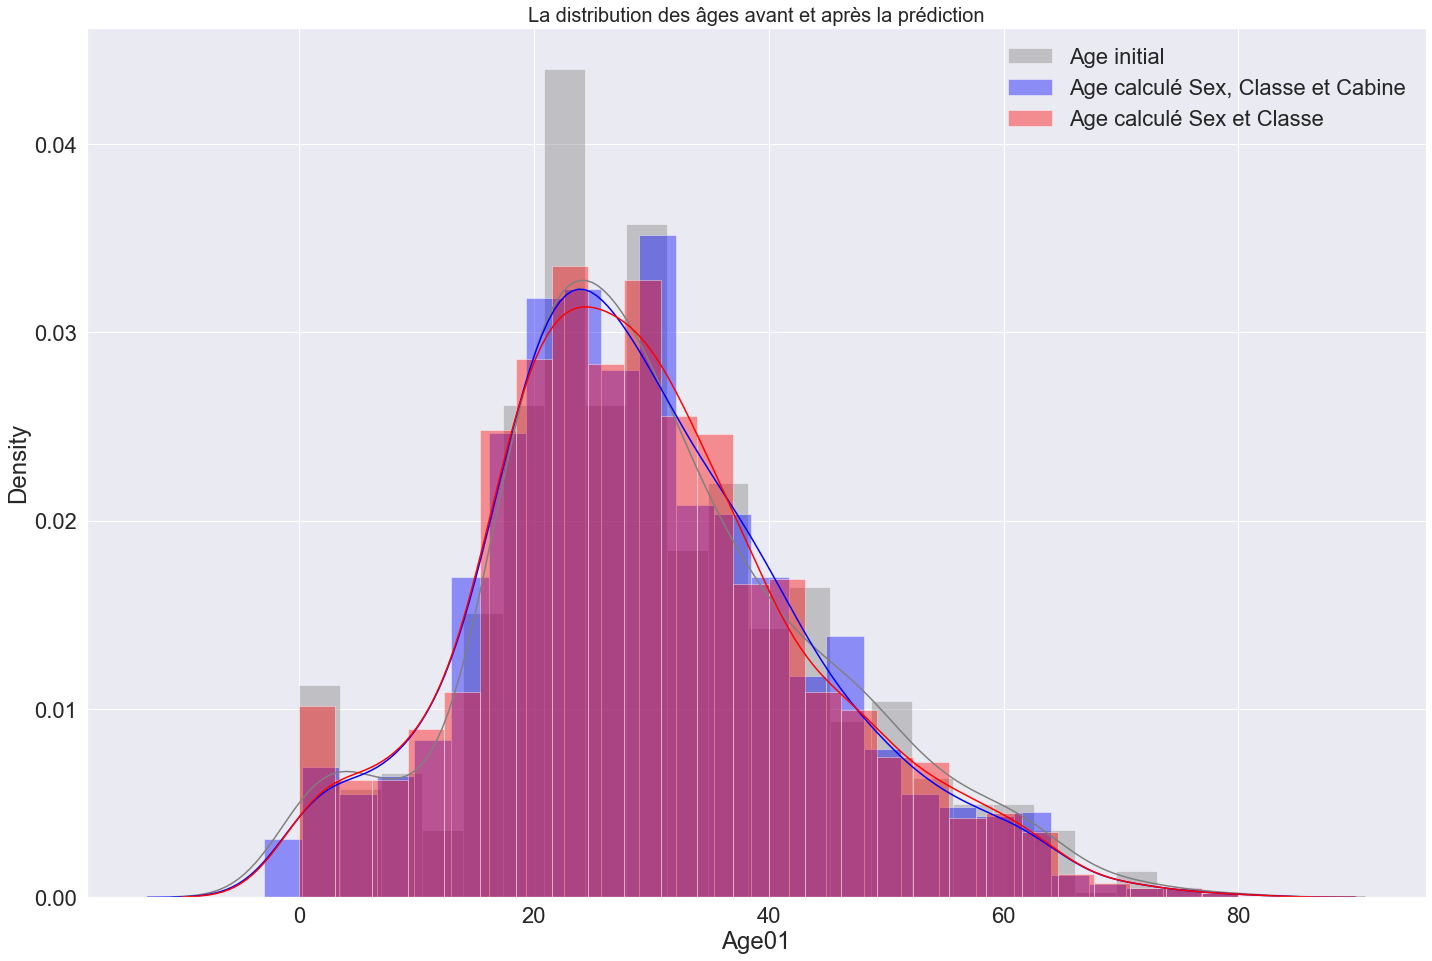

In [43]:
plt.figure(figsize=(24,16))
plt.title('La distribution des âges avant et après la prédiction',size=20)
sns.distplot(donnees[ ~donnees.AgeOld.isna()].Age ,color='grey', label="Age initial");
sns.distplot(donnees.Age02 ,color='blue', label="Age calculé Sex, Classe et Cabine");
sns.distplot(donnees.Age01 ,color='red', label="Age calculé Sex et Classe");
plt.legend()

In [44]:
donnees.Age = donnees.Age01.values
donnees.drop(columns=['AgeOld','Age01','Age02'],inplace=True)

In [45]:
donnees.head()

,Survived,Name,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,TicketNum,ConjointsOuFratrie,EnfantsOuParents,PassengerId
0,0.0,Braund,22,7.2500,Homme,Mr,2,Pas,3,S,0,A,521171,1,0,1
1,1.0,Cumings,38,71.2833,Femme,Mrs,2,C,1,C,1,PC,17599,1,0,2
2,1.0,Heikkinen,26,7.9250,Femme,Miss,1,Pas,3,S,0,SOTONOQ,23101282,0,0,3
3,1.0,Futrelle,35,53.1000,Femme,Mrs,2,C,1,S,1,Vide,113803,1,0,4
4,0.0,Allen,35,8.0500,Homme,Mr,1,Pas,3,S,0,Vide,373450,0,0,5


In [46]:
donnees.dtypes

Survived              float64
Name                   object
Age                      int8
Fare                  float64
Sex                    object
Title                  object
TailleFamille            int8
Pont                   object
Classe                  int64
Port                   object
Cabine                  int64
Ticket                 object
TicketNum              object
ConjointsOuFratrie      int64
EnfantsOuParents        int64
PassengerId             int64
dtype: object

In [47]:
listeVariblesInitiales = donnees.drop(columns=['Name']).columns
donnees = donnees.set_index('PassengerId').sort_index()

# La recherche des voyageurs en groupe 

In [48]:
donnees['TitreFamille'] = donnees.apply(lambda ligne : 'Homme' if ligne['Title'] == 'Mr'
                                                               else 'Femme' if ligne['Sex'] == 'Femme'
                                                               else 'Garçon' if ligne['Title'] == 'Master'
                                                               else 'Homme' , axis=1)

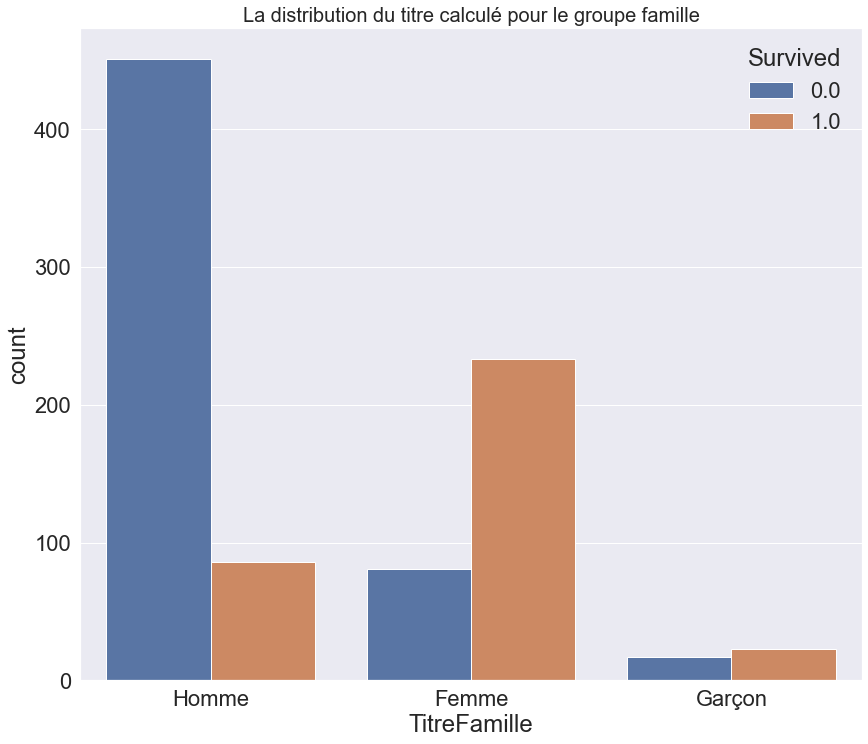

In [49]:
plt.figure(figsize=(14,12))
plt.title('La distribution du titre calculé pour le groupe famille',size=20)
sns.countplot(x='TitreFamille',hue='Survived',data=donnees);

In [50]:
donnees['GroupFamille'] = donnees.Name+'-'+\
                          donnees.Classe.apply(lambda x: '%1d' % x)+'-'+\
                          donnees.Fare.apply(lambda x: '%.3f' % x)+'-'+\
                          donnees.Port+'-'+donnees.TicketNum
donnees.GroupFamille.unique()[:6]

array(['Braund-3-7.250-S-521171', 'Cumings-1-71.283-C-17599',
       'Heikkinen-3-7.925-S-23101282', 'Futrelle-1-53.100-S-113803',
       'Allen-3-8.050-S-373450', 'Moran-3-8.458-Q-330877'], dtype=object)

In [51]:
listeGF = (donnees.groupby('GroupFamille').size()).reset_index()
listeGF.columns=['GroupFamille','Composants']

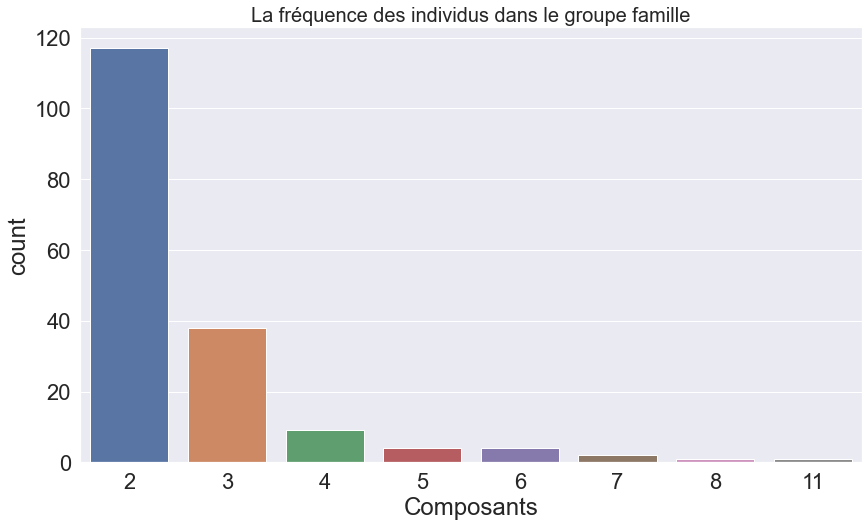

In [52]:
plt.figure(figsize=(14,8))
plt.title('La fréquence des individus dans le groupe famille',size=20)
sns.countplot(x='Composants',data=listeGF[listeGF.Composants > 1]);

In [53]:
donnees['GroupTicket'] = donnees.Classe.apply(lambda x: '%1d' % x)+'-'+\
                         donnees.Fare.apply(lambda x: '%.3f' % x)+'-'+\
                         donnees.Port+'-'+donnees.TicketNum
donnees.GroupTicket.unique()[:6]

array(['3-7.250-S-521171', '1-71.283-C-17599', '3-7.925-S-23101282',
       '1-53.100-S-113803', '3-8.050-S-373450', '3-8.458-Q-330877'],
      dtype=object)

In [54]:
listeGT = (donnees.groupby('GroupTicket').size()).reset_index()
listeGT.columns=['GroupTicket','Composants']

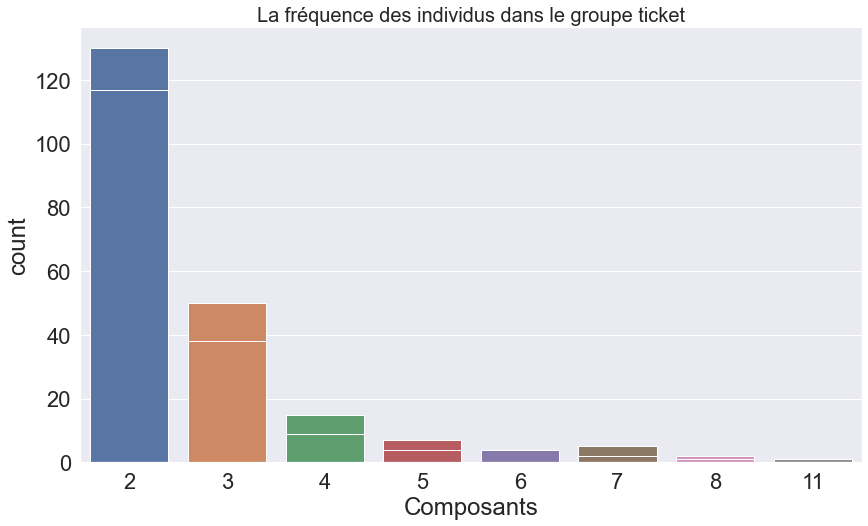

In [55]:
plt.figure(figsize=(14,8))
plt.title('La fréquence des individus dans le groupe ticket',size=20)
sns.countplot(x='Composants',data=listeGT[listeGT.Composants > 1]);
sns.countplot(x='Composants',data=listeGF[listeGF.Composants > 1]);

In [56]:
donnees.head()

,Survived,Name,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,TicketNum,ConjointsOuFratrie,EnfantsOuParents,TitreFamille,GroupFamille,GroupTicket
PassengerId,,,,,,,,,,,,,,,,,,
1,0.0,Braund,22,7.2500,Homme,Mr,2,Pas,3,S,0,A,521171,1,0,Homme,Braund-3-7.250-S-521171,3-7.250-S-521171
2,1.0,Cumings,38,71.2833,Femme,Mrs,2,C,1,C,1,PC,17599,1,0,Femme,Cumings-1-71.283-C-17599,1-71.283-C-17599
3,1.0,Heikkinen,26,7.9250,Femme,Miss,1,Pas,3,S,0,SOTONOQ,23101282,0,0,Femme,Heikkinen-3-7.925-S-23101282,3-7.925-S-23101282
4,1.0,Futrelle,35,53.1000,Femme,Mrs,2,C,1,S,1,Vide,113803,1,0,Femme,Futrelle-1-53.100-S-113803,1-53.100-S-113803
5,0.0,Allen,35,8.0500,Homme,Mr,1,Pas,3,S,0,Vide,373450,0,0,Homme,Allen-3-8.050-S-373450,3-8.050-S-373450


In [57]:
 donnees['GrFamilleFreq'] = donnees.GroupFamille.apply( lambda x : listeGF.set_index('GroupFamille').loc[x])

In [58]:
donnees['GrTicketFreq'] = donnees.GroupTicket.apply( lambda x : listeGT.set_index('GroupTicket').loc[x])

In [59]:
donnees['GrFemmeEnfGouv'] = donnees['GroupFamille']

In [60]:
donnees.GrFemmeEnfGouv = donnees.apply(lambda ligne : 
                           'Pas' if (ligne['TitreFamille'] == 'Homme') 
                                 else ligne['GroupTicket'] , axis=1) 
donnees.GrFemmeEnfGouv.unique()[:6]

array(['Pas', '1-71.283-C-17599', '3-7.925-S-23101282',
       '1-53.100-S-113803', '3-21.075-S-349909', '3-11.133-S-347742'],
      dtype=object)

In [61]:
listeGFEG = (donnees.groupby('GrFemmeEnfGouv').size()).reset_index()
listeGFEG.columns=['GrFemmeEnfGouv','Composants']

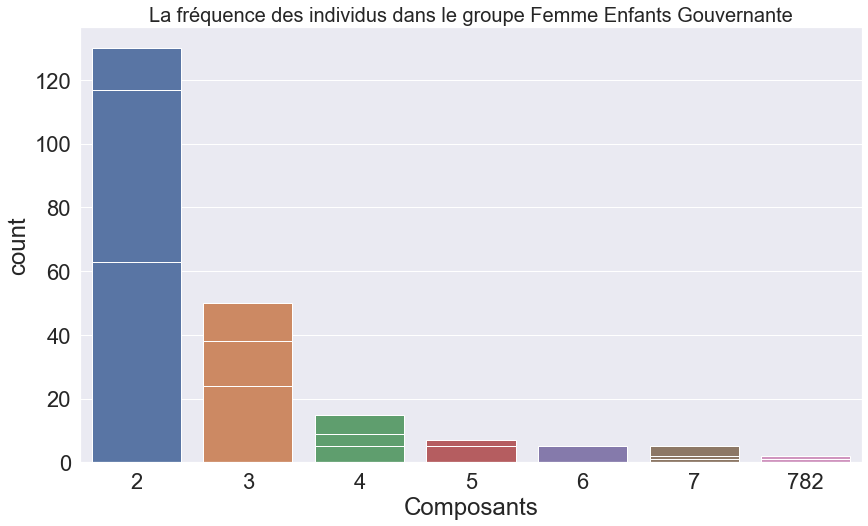

In [62]:
plt.figure(figsize=(14,8))
plt.title('La fréquence des individus dans le groupe Femme Enfants Gouvernante',size=20)
sns.countplot(x='Composants',data=listeGT[listeGT.Composants > 1]);
sns.countplot(x='Composants',data=listeGF[listeGF.Composants > 1]);
sns.countplot(x='Composants',data=listeGFEG[listeGFEG.Composants > 1]);

In [63]:
donnees['GrFemmeEnfGouvFreq'] = donnees.GrFemmeEnfGouv.apply( lambda x : listeGFEG.set_index('GrFemmeEnfGouv').loc[x])

In [64]:
donnees['GrFemmeEnfGouv2P'] = donnees.apply(lambda ligne : 
                                      'Pas' if (ligne['GrFemmeEnfGouvFreq'] == 1) 
                                            else ligne['GrFemmeEnfGouv'] , axis=1) 

In [65]:
listeGFEG2P = (donnees.groupby('GrFemmeEnfGouv2P').size()).reset_index()
listeGFEG2P.columns=['GrFemmeEnfGouv2P','Composants']

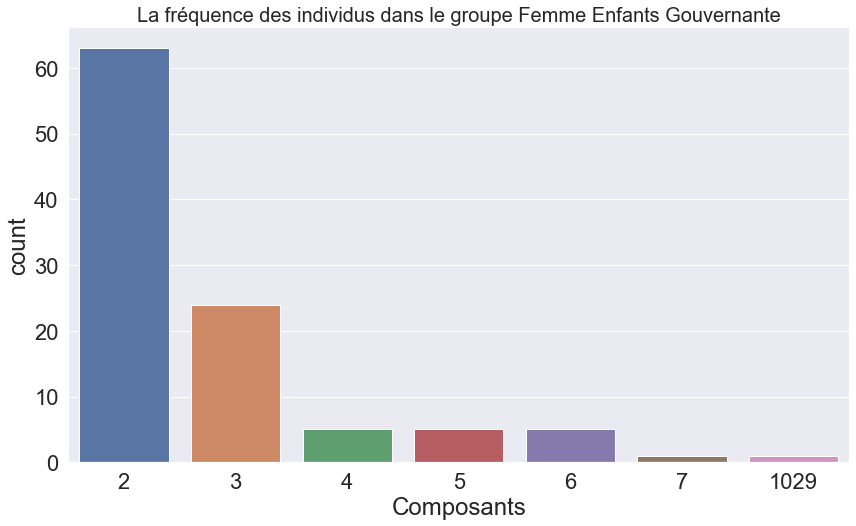

In [66]:
plt.figure(figsize=(14,8))
plt.title('La fréquence des individus dans le groupe Femme Enfants Gouvernante',size=20)
sns.countplot(x='Composants',data=listeGFEG2P);

In [67]:
donnees['GrFemmeEnfGouvFreq2P'] = donnees.GrFemmeEnfGouv2P.apply( lambda x : listeGFEG2P.set_index('GrFemmeEnfGouv2P').loc[x])

In [68]:
donnees.dtypes

Survived                float64
Name                     object
Age                        int8
Fare                    float64
Sex                      object
Title                    object
TailleFamille              int8
Pont                     object
Classe                    int64
Port                     object
Cabine                    int64
Ticket                   object
TicketNum                object
ConjointsOuFratrie        int64
EnfantsOuParents          int64
TitreFamille             object
GroupFamille             object
GroupTicket              object
GrFamilleFreq             int64
GrTicketFreq              int64
GrFemmeEnfGouv           object
GrFemmeEnfGouvFreq        int64
GrFemmeEnfGouv2P         object
GrFemmeEnfGouvFreq2P      int64
dtype: object

In [69]:
donnees.dtypes[donnees.dtypes == 'object']

Name                object
Sex                 object
Title               object
Pont                object
Port                object
Ticket              object
TicketNum           object
TitreFamille        object
GroupFamille        object
GroupTicket         object
GrFemmeEnfGouv      object
GrFemmeEnfGouv2P    object
dtype: object

In [70]:
#donnees.drop(columns=['GrFemmeEnfGouvFreq','GrTicketFreq','TitreFamille'], inplace=True)
donnees.drop(columns=['Name','TitreFamille'], inplace=True)

In [71]:
listeVariblesAvecGroups = donnees.columns